In [26]:
import polaris as po
import numpy as np
import json

# polaris login --overwrite

# Load the competition from the Hub
competition = po.load_competition("asap-discovery/antiviral-admet-2025")

# Get the train and test data-loaders
train, test = competition.get_train_test_split()

# Use the training data to train your model
# Get the input as an array with 'train.inputs' and 'train.targets'  
# Or simply iterate over the train object.

for x, y in train:
    print(x, y)

# # Work your magic to accurately predict the multi-task test set
# predictions = {
#     label: [... for x in test] 
#     for label in benchmark.target_cols
# }

# # Evaluate and submit your predictions
# competition.submit_predictions(
#     predictions=predictions,
#     prediction_name="my-first-predictions",
#     prediction_owner="kodcisaniya",
#     report_url="https://www.example.com",
#     # Other metadata is optional, but recommended:
#     # contributors, github_url, description, tags, user_attributes.
# )

[2025-02-20 22:31:43] INFO     The version of Polaris that was used to create the artifact (0.11.0) ]8;id=97865;file:///home/alisavin/.conda/envs/agentic_admet/lib/python3.11/site-packages/polaris/_artifact.py\_artifact.py]8;;\:]8;id=29273;file:///home/alisavin/.conda/envs/agentic_admet/lib/python3.11/site-packages/polaris/_artifact.py#92\92]8;;\
                               is different from the currently installed version of Polaris                        
                               (0.11.9).                                                                           

                      WARNING  You're loading data from a remote location. If the dataset is small     ]8;id=539977;file:///home/alisavin/.conda/envs/agentic_admet/lib/python3.11/site-packages/polaris/dataset/_base.py\_base.py]8;;\:]8;id=246488;file:///home/alisavin/.conda/envs/agentic_admet/lib/python3.11/site-packages/polaris/dataset/_base.py#181\181]8;;\
                               enough, consider caching the dataset first using                                    
                               CompetitionSpecification.cache() for more performant data access.                   

COC1=CC=CC(Cl)=C1NC(=O)N1CCC[C@H](C(N)=O)C1 |a:16| {'MDR1-MDCKII': 2.0, 'KSOL': nan, 'HLM': nan, 'LogD': 0.3, 'MLM': nan}
O=C(NCC(F)F)[C@H](NC1=CC2=C(C=C1Br)CNC2)C1=CC(Cl)=CC(C2CC2)=C1 |&1:7| {'MDR1-MDCKII': 0.2, 'KSOL': 333.0, 'HLM': nan, 'LogD': 2.9, 'MLM': nan}
O=C(NCC(F)F)[C@H](NC1=CC=C2CNCC2=C1)C1=CC(Br)=CC2=C1NC=N2 |&1:7| {'MDR1-MDCKII': 0.5, 'KSOL': nan, 'HLM': nan, 'LogD': 0.4, 'MLM': nan}
NC(=O)[C@H]1CCCN(C(=O)CC2=CC=CC3=C2C=CO3)C1 |&1:3| {'MDR1-MDCKII': 8.5, 'KSOL': 376.0, 'HLM': nan, 'LogD': 1.0, 'MLM': nan}
CC1=CC(CC(=O)N2CCC[C@H](C(N)=O)C2)=CC=N1 |&1:11| {'MDR1-MDCKII': 0.9, 'KSOL': 375.0, 'HLM': nan, 'LogD': -0.3, 'MLM': nan}
O=C(NCC(F)F)[C@H](NC1=CN=C2CNCC2=C1)C1=CC(Cl)=CC(C2CC2)=C1 |&1:7| {'MDR1-MDCKII': 0.8, 'KSOL': 362.0, 'HLM': nan, 'LogD': 1.5, 'MLM': nan}
COC1=CC(Cl)=CC([C@H](NC2=CC=C3CNCC3=C2)C(=O)NCC(F)F)=C1 |&1:8| {'MDR1-MDCKII': 0.7, 'KSOL': nan, 'HLM': nan, 'LogD': 0.5, 'MLM': nan}
CC1=CC([C@H](NC2=CC=C3CNCC3=C2)C(=O)NCC(F)F)=CC(C(F)(F)F)=C1 |&1:4| {'MDR1-MDCK

In [27]:
json_dict = {}
for x, y in train:
    json_dict[x] = y

with open("polaris-antiviral-admet-2025.json", "w") as f:
    json.dump(json_dict, f)

In [32]:
json_dict["CCN(CC)c1ccc(C(=O)O)cc1"]

KeyError: 'CCN(CC)c1ccc(C(=O)O)cc1'

In [24]:
import json

with open("../polaris-antiviral-admet-2025.json", "r") as f:
    json_dict = json.load(f)

for k, v in json_dict.items():
    if v["KSOL"] > 1000:
        print({k: v})

In [28]:
train_set = {}
for k, v in json_dict.items():
    if all(not np.isnan(v_i) for v_i in [v["LogD"], v["HLM"], v["MDR1-MDCKII"], v["MLM"], v["KSOL"]]):
        train_set[k] = v

In [29]:
len(train_set)

181

In [30]:
with open("polaris-antiviral-admet-2025_no_nan.json", "w") as f:
    json.dump(train_set, f)

In [21]:
train_set.pop("CC[C@H](CC1=NN=NN1)C1=CC=C(NC(=O)C2=CC(Cl)=CC(NC(=O)OCC3=CC=CC=C3)=C2)C=C1")

KeyError: 'CC[C@H](CC1=NN=NN1)C1=CC=C(NC(=O)C2=CC(Cl)=CC(NC(=O)OCC3=CC=CC=C3)=C2)C=C1'

In [25]:
json_dict["CC[C@H](CC1=NN=NN1)C1=CC=C(NC(=O)C2=CC(Cl)=CC(NC(=O)OCC3=CC=CC=C3)=C2)C=C1"]

{'HLM': 24.9, 'MDR1-MDCKII': 2.79, 'MLM': nan, 'LogD': 4.1, 'KSOL': 60.0}

In [23]:
for k, v in train_set.items():
    print(k, v)

CN(C1=CC=C2CNCC2=C1)[C@H](C(=O)NCC(F)F)C1=CC(Cl)=CC(C2CC2)=C1 {'HLM': 17.1, 'MDR1-MDCKII': 2.1, 'MLM': 10.6, 'LogD': 1.6, 'KSOL': 172.0}
N#CC1=CC2=C(C=C1NC(=O)C1=CC(F)=CC3=C1C=NN3)CNC2 {'HLM': 16.7, 'MDR1-MDCKII': 3.9, 'MLM': 288.0, 'LogD': 0.6, 'KSOL': 193.0}
O=C(NC1=CC=C2CNCC2=C1)C1=CC(F)=CC(C2=CNN=C2)=C1 {'HLM': 36.3, 'MDR1-MDCKII': 1.62, 'MLM': 553.0, 'LogD': 0.7, 'KSOL': 184.0}
COCCNC(=O)[C@H](NC1=CC=C2CNCC2=C1)C1=CC(Cl)=CC(C2CC2)=C1 {'HLM': 19.7, 'MDR1-MDCKII': 1.4, 'MLM': 11.7, 'LogD': 1.0, 'KSOL': 320.0}
O=C(NC1=CC(Br)=C2CNCC2=C1)C1=CC(F)=CC2=C1C=NN2 {'HLM': 13.6, 'MDR1-MDCKII': 3.4, 'MLM': 145.0, 'LogD': 1.8, 'KSOL': 4.0}
O=C(NC1=CC2=C(C=C1Br)CNC2)C1=CC(F)=CC2=C1C=NN2 {'HLM': 11.4, 'MDR1-MDCKII': 7.65, 'MLM': 299.0, 'LogD': 1.1, 'KSOL': 47.0}
O=C(NC1=CC=C2CNCC2=C1)C1=CC=CC2=C1C=C(C(F)(F)F)N2 {'HLM': 14.1, 'MDR1-MDCKII': 4.1, 'MLM': 12.7, 'LogD': 1.5, 'KSOL': 372.0}
CCN1C(C)=NN=C1SC1=CC(C)=NC2=NC=NN12 {'HLM': 16.5, 'MDR1-MDCKII': 0.401, 'MLM': 10.0, 'LogD': -0.5, 'KSOL': 348.0}

In [8]:
import pandas as pd 
import numpy as np
import json

with open("polaris-antiviral-admet-2025_no_nan.json", "r") as f:
    train_set = json.load(f)

df = pd.DataFrame(train_set.values())

array([[<Axes: title={'center': 'MDR1-MDCKII'}>,
        <Axes: title={'center': 'KSOL'}>],
       [<Axes: title={'center': 'HLM'}>,
        <Axes: title={'center': 'LogD'}>],
       [<Axes: title={'center': 'MLM'}>, <Axes: >]], dtype=object)

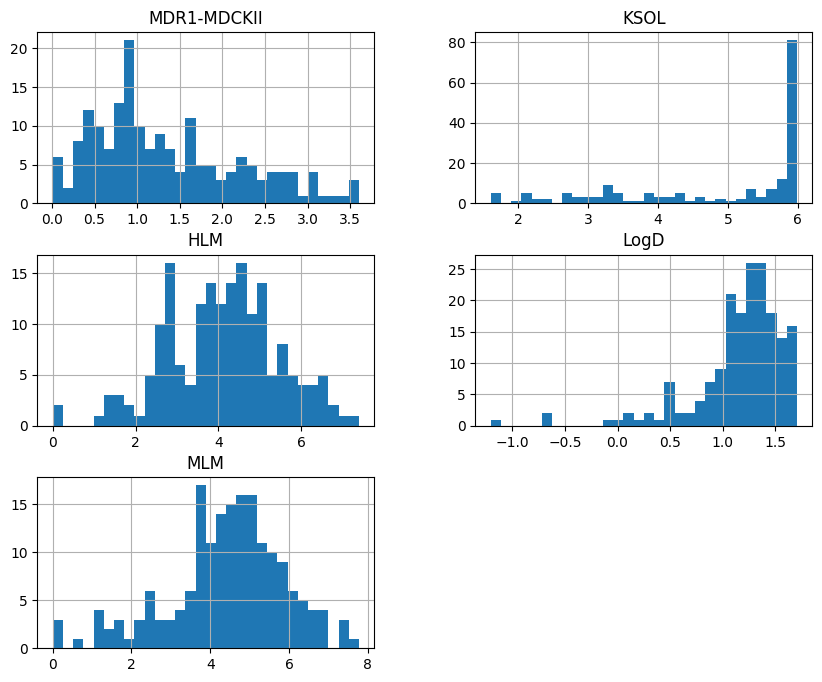

In [9]:
df_log = df.apply(np.log1p)
df_log.hist(bins=30, figsize=(10, 8))

/var/tmp/ipykernel_2102533/1289538273.py:60: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()



Scale factor: 1.0

Scale factor: 0.1

Scale factor: 0.01


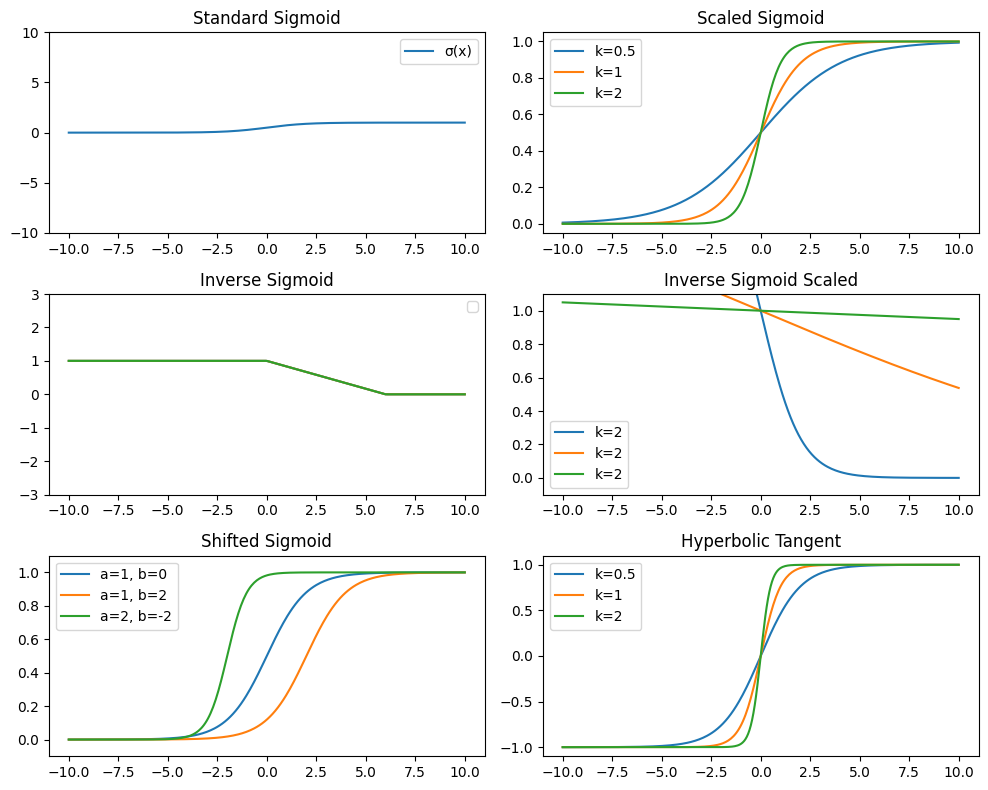

In [27]:
from matplotlib import pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def inverse_sigmoid(x):
    return 1-(1 / (1 + np.exp(-x)))

def mae(x):
    return np.clip(1-(1/6)*x, 0, 1)

# def inverse_log(x):
#     return 10/(x) +5

def inverse_sigmoid_normalized(x, scale=0.1):  # Try different scale values like 0.01, 0.1, 0.5
    return 2 / (1 + np.exp(scale * x))

# 2) Scaled (temperature) sigmoid: σ_k(x) = 1 / (1 + e^(-k * x))
def sigmoid_k(x, k):
    return 1 / (1 + np.exp(-k * x))

# 3) Shifted sigmoid: σ(x; a, b) = 1 / (1 + e^(-a * (x - b)))
def shifted_sigmoid(x, a=1, b=0):
    return 1 / (1 + np.exp(-a * (x - b)))

# 4) Hyperbolic tangent: tanh(x) = (e^x - e^-x) / (e^x + e^-x)
def tanh_k(x, k=1):
    return np.tanh(k * x)

# Create an array of x values for plotting
x = np.linspace(-10, 10, 300)

# Prepare the figure
plt.figure(figsize=(10, 8))

# --- Subplot 1: Standard Sigmoid ---
plt.subplot(3, 2, 1)
y = sigmoid(x)
plt.plot(x, y, label='σ(x)')
plt.title('Standard Sigmoid')
plt.ylim(-10, 10)
plt.legend()

# --- Subplot 2: Scaled Sigmoid ---
plt.subplot(3, 2, 2)
for k in [0.5, 1, 2]:
    y_k = sigmoid_k(x, k)
    plt.plot(x, y_k, label=f'k={k}')
plt.title('Scaled Sigmoid')
# plt.ylim(-0.1, 1.1)
plt.legend()

# --- Subplot 2: Scaled Sigmoid ---
plt.subplot(3, 2, 3)
for k in [0.5, 1, 2]:
    y_k = mae(x)
    plt.plot(x, y_k)
plt.title('Inverse Sigmoid')
plt.ylim(-3, 3)
plt.legend()

plt.subplot(3, 2, 4)
for scale in [1.0, 0.1, 0.01]:
    print(f"\nScale factor: {scale}")
    y_k = inverse_sigmoid_normalized(x, scale)
    plt.plot(x, y_k, label=f'k={k}')
plt.title('Inverse Sigmoid Scaled')
plt.ylim(-0.1, 1.1)
plt.legend()

# --- Subplot 3: Shifted Sigmoid ---
plt.subplot(3, 2, 5)
params = [(1, 0), (1, 2), (2, -2)]
for a, b in params:
    y_ab = shifted_sigmoid(x, a, b)
    plt.plot(x, y_ab, label=f'a={a}, b={b}')
plt.title('Shifted Sigmoid')
plt.ylim(-0.1, 1.1)
plt.legend()

# --- Subplot 4: Hyperbolic Tangent ---
plt.subplot(3, 2, 6)
for k in [0.5, 1, 2]:
    y_t = tanh_k(x, k)
    plt.plot(x, y_t, label=f'k={k}')
plt.title('Hyperbolic Tangent')
plt.ylim(-1.1, 1.1)
plt.legend()

plt.tight_layout()
plt.show()

In [20]:
2 / (1 + np.exp(0))

1.0

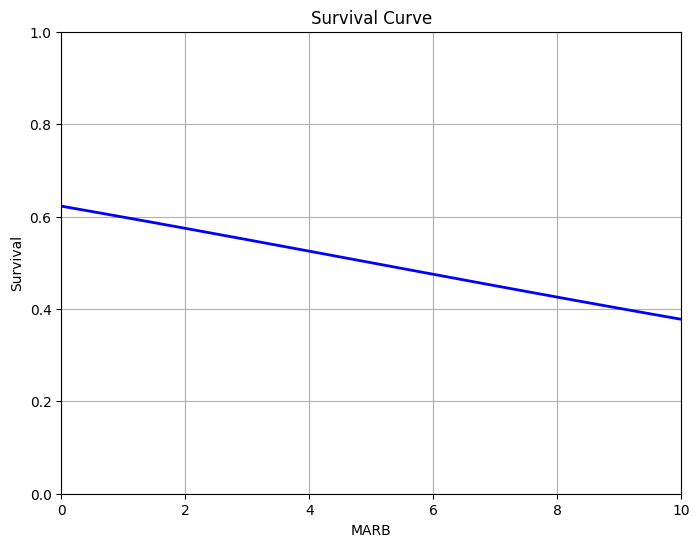

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import expit

def survival_curve(x, scale=10, shift=5):
    """
    Creates a survival curve that matches the hand-drawn pattern
    
    Parameters:
    x: array-like, Input values (MARB scores)
    scale: float, Controls the steepness of the curve
    shift: float, Controls the midpoint of the curve
    
    Returns:
    array-like: Survival probabilities
    """
    # Create the sigmoid-like curve that drops from 1 to near 0
    y = 1 - expit((x - shift) / scale)
    
    # Add a small plateau at the end to match the drawing
    y = np.where(x > shift + scale, y * 0.9 + 0.1, y)
    
    return y

# Example usage:

# Generate x values
x = np.linspace(0, 10, 100)

# Calculate survival probabilities
y = survival_curve(x)

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(x, y, 'b-', linewidth=2)
plt.xlabel('MARB')
plt.ylabel('Survival')
plt.title('Survival Curve')
plt.grid(True)
plt.ylim(0, 1)
plt.xlim(0, 10)
plt.show()